In [2]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/zalando-research/fashionmnist')

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset , DataLoader
import torch.optim as optim

In [7]:
# checking for a gpu

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [8]:
# featching data

df=pd.read_csv('/content/fashionmnist/fashion-mnist_train.csv')

In [10]:
df.shape

(60000, 785)

## Visualizing first 9 images in the dataset

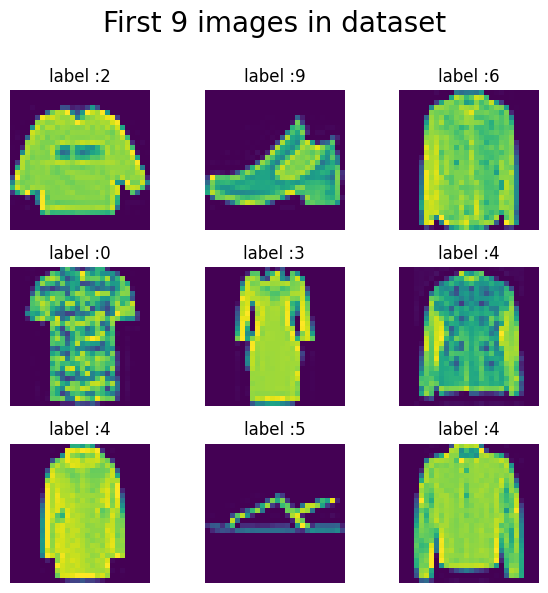

In [15]:


#plotting grid
fig , axes =plt.subplots(3,3,figsize=(6,6))
fig.suptitle('First 9 images in dataset',fontsize=20)

# plotting the imges

for i , ax in enumerate(axes.flat):
  img=df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f'label :{df.iloc[i,0]}')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


In [16]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
x=df.drop(columns=['label'])
y=df['label']

In [18]:
# scaling the features

x=x/255.0

In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.15,random_state=21)

In [34]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [28]:

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(np.array(features), dtype=torch.float32) # first converting dataframe to numpy array then in tensor
        self.labels = torch.tensor(np.array(labels), dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [29]:
train_dataset = CustomDataset(x_train, y_train)
test_dataset = CustomDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [39]:
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.layer1 = nn.Linear(num_features, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 64)
        self.layer4 = nn.Linear(64, 32)
        self.layer5 = nn.Linear(32, 10)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.batchnorm3 = nn.BatchNorm1d(64)

    def forward(self, x):
        x = self.layer1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.layer2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.layer3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.layer4(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.layer5(x)
        return x


In [40]:
# parameters
learning_rate=0.01
epochs=50

model= MyModel(x_train.shape[1])
model = model.to(device) # sending model on gpu


# loss function
loss_fn=nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-4)




In [43]:
# training loop

for epoch in range(epochs):
  total_epoch_loss=0
  for batch_features,batch_labels in train_loader:

    # sending batches to gpu
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

     # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = loss_fn(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')



Epoch: 1 , Loss: 0.7204259076579901
Epoch: 2 , Loss: 0.5425560178522633
Epoch: 3 , Loss: 0.498735260952222
Epoch: 4 , Loss: 0.47405957563346723
Epoch: 5 , Loss: 0.4525140009568058
Epoch: 6 , Loss: 0.43531865183465007
Epoch: 7 , Loss: 0.4243756155606121
Epoch: 8 , Loss: 0.4126924656826998
Epoch: 9 , Loss: 0.403791384530748
Epoch: 10 , Loss: 0.402350564654379
Epoch: 11 , Loss: 0.39161413103351406
Epoch: 12 , Loss: 0.389473592934936
Epoch: 13 , Loss: 0.38086803956249426
Epoch: 14 , Loss: 0.3746846015734535
Epoch: 15 , Loss: 0.36958540558646735
Epoch: 16 , Loss: 0.3651890988173045
Epoch: 17 , Loss: 0.36172487734906944
Epoch: 18 , Loss: 0.3601372763374294
Epoch: 19 , Loss: 0.35783355678881573
Epoch: 20 , Loss: 0.35339907615666405
Epoch: 21 , Loss: 0.35246845154346457
Epoch: 22 , Loss: 0.348663375989874
Epoch: 23 , Loss: 0.34667686403844705
Epoch: 24 , Loss: 0.33893925501933436
Epoch: 25 , Loss: 0.33891951088960676
Epoch: 26 , Loss: 0.33790189401250115
Epoch: 27 , Loss: 0.3387283230272859
Ep

# Evaluating model


In [44]:
model.eval() # setting model on evaluation mode

# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8931111111111111


In [45]:
# evaluation on training data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.9331372549019608
